# 기계 이해

Machne Comprehension은 기계가 어떤 텍스트에 대한 정보를 학습하고 사용자가 질의를 던졌을 때 그에 대해 응답하는 문제다. 다시 말하자면 기계가 텍스트를 이해하고 논리적 추론을 할 수 있을지 데이터 학습을 통해 보는 것이다.

#### 텍스트
##### "자연어 처리 또는 자연 언어 처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 모사 할 수 있도록 연구하고 이를 구현하는 인공지능의 주요 분야 중 하나다. 자연 언어 처리는 연구 대상이 언어이기 대문에 당연하게도 언어 자체를 연구하는 언어학과 언어 현상의 내적 기재를 탐구하는 언어 인지 과학과 연관이 깊다. 구현을 위해 수학적 통계적 도구를 많이 활용하며 특히 기계학습 도구를 많이 사용하는 대표적인 분야이다. QA 시스템, 문서 자동 분류, 신문기사 클러스터링, 대화형 Agent 등 다양한 응용이 이루어 지고 있다."

#### 질문
##### "자연어 처리는 어느 분야 중 하나인가?"

예를 들어, 기계한테 위와 같은 텍스트에 대한 내용을 학습시켰다고 하자. 그리고 "자연어 처리는 어느 분야 중 하나인가?"라는 텍스트와 고나련이 있는 질문을 기계에게 한다. 그러면 기계는 위 텍스트의 내용을 토대로 추론해서 이에 대한 응답을 텍스트 내에서 하거나 정답 선택지를 선택하는 방식으로 답하게 된다.

이 문제는 지금까지 소개한 자연어 처리에 대한 개념을 모두 활용하는 작업이다. 우선 텍스트와 질의에 대한 정보를 알기 위해서는 각 문장의 의미 벡터를 추출할 수 있어야 한다. 이 경우에는 단어 표현 벡터를 활용해 문장의 의미를 표현하는 벡터를 추출할 수 있다.

그리고 텍스트와 질의에 대한 문장 정보 간의 관계가 어떠한지를 보기 위해 문장 유사도를 구하는 방식이 필요할 수 있다. 경우에 따라서는 반대로 질의 내용에 대한 정보를 기반으로 텍스트에 대한 언어 정보를 새롭게 생성하고자 할 수도 있는데 이 방식은 언어 생성 모델과 밀접한 관련이 있다.

또한 이런 질의 정보 데이터를 정리해서 질의한 내용에 대한 응답을 선택할 수 있게 정답에 대한 내용을 분류할 수도 있다.

다음은 한 기계 이해 모델 중 하나인 "메모리 네트워크(Memory Network)"를 통해 앞에서 설명한 자연어 처리 기술이 기계 이해에 어떻게 활용되는지 보여준다.

##### Text1 : Mary moved to the bathroon.
##### Text2 : John went to the hallway.
##### Query : Where is Mary?
##### Answer : bathroom

위의 내용은 BABI 데이터셋이라 불리는 기계 이해 학습을 위한 데이터셋 중 하나다. 이 데이터에는 각 문장에 대한 정보가 담겨있고, 그 정보에 관련된 질의를 던지게 된다. 이 때 응답은 주어진 응답 선택지 안에서 선택할 수 있게 데이터가 구성되어 있다. 다음은 이러한 데이터를 가지고 어떻게 기계가 텍스트를 이해하고 질문의 답을 추론할 수 있는지 도식화한 메모리 네트워크다.

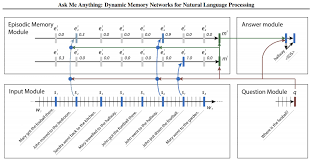

In [1]:
from IPython.display import Image
Image("Image/888.png")

입력값으로 질의를 입력했을 때 텍스트 정보를 통해 어떻게 답해줄 것인지를 본다. 우선은 정보를 주기 위한 문장들이 주어지는데 이 문장들을 벡터로 만든다. 이후 이 문장 벡터들을 모아서 두 개의 행렬로 만드는데, 이렇게 만든 행렬을 통해 질의와 유사도를 측정한다. 유사도를 측정한 후 유사도가 높은 정보에 대해 가중치를 줘서 출력을 만들어 낸다. 이러한 과정을 학습시키면서 각 질의가 정보 문장 중 어떤 문장과 관련이 높은지, 그리고 문장 안에서도 어떠한 단어가 질의에 대한 답인지를 예측할 수 있게 한다. 

메모리 네트워크의 사례를 보면 알 수 있듯이 기계 이해는 자연어 처리 기술에 대한 개념이 총 망라된 학습 태스크이다. 그렇기 때문에 다른 자연어 처리 태스크와 비교하면 어렵고, 더욱 복잡한 모델링을 필요로 한다.

# 데이터셋

기계 이해 태스크에서는 대체로 자연 언어를 이해하는 과제에서 기계가 텍스트 내용에 대해 추론을 잘 하는지 파악하는 목적에서 학습하게 된다. 그렇기 때문에 이 태스크를 QA 태스크라고 부르며 보통 Question Answering(QA) 형태의 데이터셋을 활용해 기계에게 학습하게 한다.

#### bAbI

바비(bAbI) 데이터셋은 페이스북 AI 연구팀에서 기계가 데이터를 통해 학습해서 텍스트를 이해하고 추론하는 목적에서 만들어진 데이터셋이다. 총 20가지 부류의 질문 내용으로 구성되어 있으며 질문 데이터셋 구성은 아래 그림과 같다.

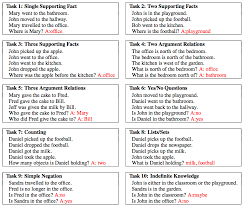

In [1]:
from IPython.display import Image
Image("Image/999.png")

그림과 같이 bAbI 데이터셋은 시간 순서대로 나열된 텍스트 문장 정보와 그에 대한 질문으로 구성되어 텍스트 정보에 대해 질문을 던지고 응답하는 형태다.

#### SQuAD

SQuAD(Stanford Question Answering Dataset)는 기계 이해 태스크에서 가장 유명한 데이터셋 중 하나다. 스탠퍼드 자연어 처리 연구실에서 만들었으며 위키피디아에 있는 내용을 크라우드 소싱해서 QA 데이터셋으로 만들었다. 46개의 주제에 대해 약 10만 개의 질문 데이터셋으로 구성되어 있으며 인물, 시간, 장소, 이유 등 다양한 형태의 질문이 있다. 그 뿐만 아니라 약 10만 개의 어휘와 짧은 텍스트에서 400단어가 넘는 긴 텍스트까지 다양한 길이의 지문을 포함하고 있어 상당히 어려운 분야로 손꼽힌다.

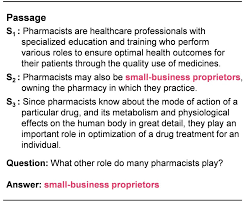

In [2]:
from IPython.display import Image
Image("Image/101010.png")

#### Visual Question Answering(VQA)

VQA는 이미지에 대한 정보와 텍스트 질의를 통해 이미지 컨텍스트에 해당하는 응답을 알려주는 태스크다.

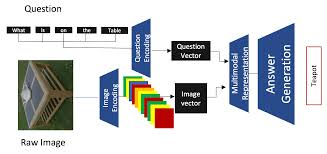

In [5]:
from IPython.display import Image
Image("Image/111111.jpeg")